#### Import both Databases with transfer and player data

In [65]:
import pandas as pd

player_transfer_df = pd.read_csv('/home/ricardo/Downloads/transfer_history_combined.csv') 
player_features_df = pd.read_csv('/home/ricardo/Downloads/players_combined.csv') 


player_features_df["last_name"]=+player_features_df["short_name"].str.extract(r'\b(\w+)$', expand=True)


player_features_df.head(2)

/home/ricardo/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,FIFA year,last_name
0,0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015,Messi
1,1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015,Ronaldo


#### Creation of first_name list

In [66]:
split= player_features_df['long_name'].str.split(' ',1)

first_name=[]
first_names_list=[]

for index,value in split.items():
    first_name.append(value)

for i in range(len(first_name)):
    first_names_list.append(first_name[i][0])

first_names_list

['Lionel',
 'Cristiano',
 'Arjen',
 'Zlatan',
 'Manuel',
 'Luis',
 'Eden',
 'Robin',
 'Bastian',
 'Franck',
 'Radamel',
 'Gareth',
 'Robert',
 'Philipp',
 'Sergio',
 'Thiago',
 'David',
 'Luka',
 'James',
 'Neymar',
 'Thibaut',
 'Mats',
 'Ángel',
 'Marco',
 'Thomas',
 'Sergio',
 'Mesut',
 'Xavier',
 'Gnégnéri',
 'Wayne',
 'Vincent',
 'Mario',
 'Sergio',
 'Toni',
 'Karim',
 'Edinson',
 'Diego',
 'Arturo',
 'Hugo',
 'Javier',
 'Juan',
 'Jérôme',
 'Petr',
 'Carlos',
 'Gerard',
 'Arda',
 'Alexis',
 'Oscar',
 'Samir',
 'Medhi',
 'Sami',
 'Gonzalo',
 'Salvatore',
 'Iker',
 'Andrea',
 'Xabier',
 'Daniele',
 'Giorgio',
 'Wesley',
 'Santiago',
 'Klaas-Jan',
 'Francesc',
 'Diego',
 'Paul',
 'Francisco',
 'İlkay',
 'David',
 'Juan',
 'Daniel',
 'Miralem',
 'Aaron',
 'Pedro',
 'Ezequiel',
 'Blaise',
 'Stéphane',
 'Ivan',
 'Antonio',
 'Roman',
 'John',
 'Per',
 'Jérémy',
 'Képler',
 'Andrea',
 'Nemanja',
 'Javier',
 'Álvaro',
 'Daniel',
 'Jesús',
 'Diego',
 'Igor',
 'Jefferson',
 'João',
 'Samir',


#### Turn first name list into dataframe df and concatenate the dataframe with the original player features df. Now we have first and last name on the last 2 columns

In [67]:
df = pd.DataFrame (first_names_list, columns = ['first_name'])

player_features_concat_df = pd.concat([player_features_df,df], axis=1, sort=False) 
player_features_concat_df[["sofifa_id","short_name","long_name","age","last_name","first_name"]].tail(50)

,sofifa_id,short_name,long_name,age,last_name,first_name
100945,246468,Park Han Geun,박한근 Han Geun Park,23,Geun,박한근
100946,247224,Wang Zhifeng,Zhifeng Wang,22,Zhifeng,Zhifeng
100947,243107,Cui Lin,崔麟,21,Lin,崔麟
100948,251365,P. Królczyk,Patryk Królczyk,25,Królczyk,Patryk
100949,243117,Xie Weijun,谢维军,21,Weijun,谢维军
100950,182461,Zhou Ting,周挺,40,Ting,周挺
100951,247775,Zhang Junzhe,张俊哲,28,Junzhe,张俊哲
100952,248376,Tao Qianglong,陶强龙,17,Qianglong,陶强龙
100953,252890,B. McPherson,Brandon McPherson,17,McPherson,Brandon
100954,252891,J. Hope,Joseph Hope,17,Hope,Joseph


#### Concatenate a new column with the full name and preprocess the data to lower case and remove accents

In [68]:
player_features_concat_df["player_name"]=player_features_concat_df["first_name"]+ " " +player_features_concat_df["last_name"]

player_features_concat_df["player_name"]=player_features_concat_df["player_name"].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
player_features_concat_df.drop(player_features_df.filter(regex="Unname"),axis=1, inplace=True)

In [69]:
player_features_concat_df[["sofifa_id","short_name","long_name","age","last_name","first_name","player_name"]].head(5)

,sofifa_id,short_name,long_name,age,last_name,first_name,player_name
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,Messi,Lionel,lionel messi
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,Ronaldo,Cristiano,cristiano ronaldo
2,9014,A. Robben,Arjen Robben,30,Robben,Arjen,arjen robben
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,Ibrahimović,Zlatan,zlatan ibrahimovic
4,167495,M. Neuer,Manuel Neuer,28,Neuer,Manuel,manuel neuer


#### Checking the nº of unique players in the features dataframe

In [70]:
player_features_concat_df.columns[:20]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate'],
      dtype='object')

In [71]:
player_features_concat_df["sofifa_id"].nunique()

36559

In [72]:
player_features_concat_df["long_name"].nunique()

37292

testing with zlatan ----concat_df[concat_df["player_name"]=="zlatan ibrahimovic"]

# Preprocessing player names in the transfer dataset

In [73]:
player_transfer_df["player_name"]=player_transfer_df["player_name"].str.lower().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
player_transfer_df.drop(player_transfer_df.filter(regex="Unname"),axis=1, inplace=True)
player_transfer_df["FIFA year"]=player_transfer_df["year"]+1

## dropping NaNs in fee_cleaned
player_transfer_df = player_transfer_df.loc[player_transfer_df["fee_cleaned"].notna()]
## dropping 0.0 transfer fees
player_transfer_df = player_transfer_df.loc[player_transfer_df["fee_cleaned"]!=0]
## dropping in vs. out duplications
player_transfer_df = player_transfer_df.loc[player_transfer_df["year"]>2014]

#### Checking nº of unique values in the transfer dataset

In [74]:
player_transfer_df["club_name"].nunique()

249

In [75]:
player_transfer_df["player_name"].value_counts().sum()

9857

In [76]:
player_transfer_df[player_transfer_df["player_name"]=="jese rodruguez"]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,FIFA year


#### Merging tables by player name and FIFA year - inner join

In [77]:
merged_df = player_transfer_df.merge(player_features_concat_df, on=["player_name","FIFA year"], how='inner')

In [78]:
merged_df.head()

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name
0,Paris Saint-Germain,layvin kurzawa,22.0,Left-Back,Monaco,£22.50m,in,Summer,22.50,Ligue 1,...,78+0,78+0,80+0,80+0,78+0,78+0,78+0,80+0,Kurzawa,Layvin
1,AS Monaco,layvin kurzawa,22.0,Left-Back,Paris SG,£22.50m,out,Summer,22.50,Ligue 1,...,78+0,78+0,80+0,80+0,78+0,78+0,78+0,80+0,Kurzawa,Layvin
2,Paris Saint-Germain,serge aurier,22.0,Right-Back,Toulouse,£9.00m,in,Summer,9.00,Ligue 1,...,77+0,77+0,80+0,80+0,78+0,78+0,78+0,80+0,Aurier,Serge
3,FC Toulouse,serge aurier,22.0,Right-Back,Paris SG,£9.00m,out,Summer,9.00,Ligue 1,...,77+0,77+0,80+0,80+0,78+0,78+0,78+0,80+0,Aurier,Serge
4,Paris Saint-Germain,kevin trapp,25.0,Goalkeeper,E. Frankfurt,£8.55m,in,Summer,8.55,Ligue 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trapp,Kevin


#### Checking unique player names with transfer data. Beware of in-out transfermovement duplicates, as well fees not being cleaned and transfer data from 1992 onwards

In [79]:
merged_df["player_name"].nunique()

2784

In [80]:
## dropping NaNs in fee_cleaned
merged_df = merged_df.loc[merged_df["fee_cleaned"].notna()]
## dropping 0.0 transfer fees
merged_df = merged_df.loc[merged_df["fee_cleaned"]!=0]
## dropping in vs. out duplications
merged_df = merged_df.loc[merged_df["transfer_movement"]!="in"]
merged_df = merged_df.loc[merged_df["year"]>2014]

In [81]:
merged_df["player_name"].nunique()

1993

#### Attention : some players have several dozen records (several players with the same first and last name) while others have only one (transfer from/to outside europe). However as you can see below most players have less than 10 transfer records which is fine. Most will not have cleaned transfer fees as weel

In [17]:
merged_df.player_name.value_counts()

adama traore         7
jeison murillo       6
simone zaza          6
vincenzo grifo       5
ervin zukanovic      5
                    ..
jose naranjo         1
anaitz arbilla       1
diogo figueiras      1
tomas pina           1
cristian espinoza    1
Name: player_name, Length: 1993, dtype: int64

(array([1.428e+03, 4.160e+02, 0.000e+00, 1.070e+02, 0.000e+00, 3.300e+01,
        6.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

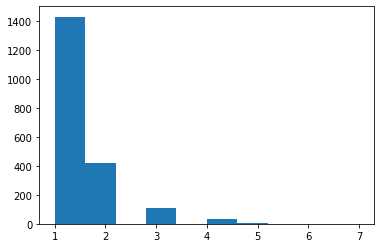

In [18]:
import matplotlib.pyplot as plt

plt.hist(merged_df.player_name.value_counts())

#### Around 3000 players with a numeric transfer fee

In [19]:
merged_df[merged_df["fee_cleaned"]>0.1]["player_name"].value_counts()

adama traore         7
simone zaza          6
jeison murillo       6
cristian ansaldi     5
gerard deulofeu      5
                    ..
aboubakar kamara     1
prince gouano        1
bongani zungu        1
jose naranjo         1
cristian espinoza    1
Name: player_name, Length: 1928, dtype: int64

In [36]:
merged_df[merged_df["player_name"]=="georges koudou"]

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name


In [21]:
merged_df[merged_df["player_name"]=="joao pedro"][["player_name","FIFA year","sofifa_id"]].groupby("sofifa_id").count()

,player_name,FIFA year
sofifa_id,,
199254,1,1
213557,1,1


In [22]:
tmp=merged_df[merged_df["player_name"]=="douglas costa"]

In [23]:
tmp[tmp["sofifa_id"]==199254]

,club_name,player_name,age_x,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,last_name,first_name


In [24]:
!pwd

/home/ricardo/code/michaelschafhauser/market_value_predictor/notebooks


In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://sofifa.com/players"

no_match_df = pd.read_csv('../raw_data/not_matching_names.csv')
no_match_df['sofifa_id'] = 0

for idx, name in enumerate(no_match_df['name']):
    params = {
        'keyword': name
    }
    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.content, 'html.parser')
    try:
        sofifa_id = soup.find("img", class_="player-check").get('id')
        no_match_df['sofifa_id'][idx] = sofifa_id
    except AttributeError:
        no_match_df['sofifa_id'][idx] = 'Nan'

/tmp/ipykernel_39958/2782768842.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_match_df['sofifa_id'][idx] = sofifa_id


KeyboardInterrupt: 

In [ ]:
no_match_df["sofifa_id"].value_counts().head(50)